# Titanic - Machine Learning From Disaster (Kaggle Challenge)
## Predictive model to ascertain likelihood of survival at the (unfortunate) Titanic based on given parameters. 
### From the perspective of a Year 1 - Business Analytics Student

### Would follow Ken Jee's approach to analyzing the data. <br>Link to his YouTube channel: (https://www.youtube.com/@KenJee_ds/)

## *__Data Overview__* (WIP)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression #For Logistic Regression

## *__Preliminary Data Loading and Investigation__*

### 1. Data Loading

In [2]:
train_set = pd.read_csv("/Users/geolangsatnarzary/Study - NTU_NBS/01 - A-Career/Kaggle/train.csv")
test_set = pd.read_csv("/Users/geolangsatnarzary/Study - NTU_NBS/01 - A-Career/Kaggle/test.csv")

# Pre-defining the data sets with training or testing indicators for future data merges
train_set["train_test"] = 1
test_set["train_test"] = 0

#Setting all values of test-set to NaN
test_set["Survived"] = np.NaN

# Full merged data for future use
df = pd.concat([train_set,test_set])

### 2. Understanding the dataset and central tendencies of numeric data

In [13]:
df.info()
print(df.head(10))

# Training Set Data: Statistical analysis on the numeric data along with central tendencies of data
train_set.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
 12  train_test   1309 non-null   int64  
dtypes: float64(3), int64(5), object(5)
memory usage: 143.2+ KB
   PassengerId  Survived  Pclass  \
0            1       0.0       3   
1            2       1.0       1   
2            3       1.0       3   
3            4       1.0       1   
4            5      

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,train_test
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.0
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,1.0
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.0
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,1.0
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,1.0
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.0
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.0
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.0


### 3. Seperating numeric and categorical data for further analysis 

In [14]:
# Separating Numeric and Categorical Data 
train_num = train_set[["Age","SibSp","Parch","Fare"]]
train_cat = train_set[["Survived","Pclass","Sex","Ticket","Cabin","Embarked"]]

### 4. Histograms to look at numeric data distribution 

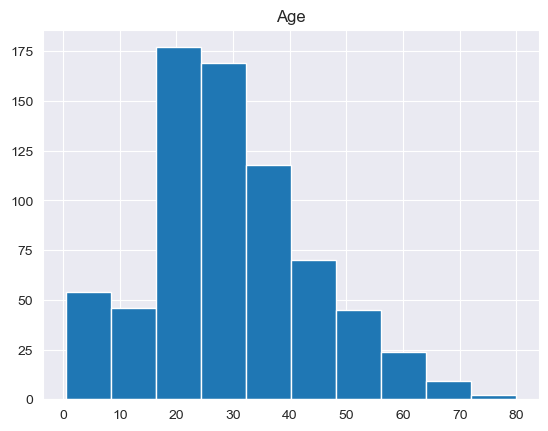

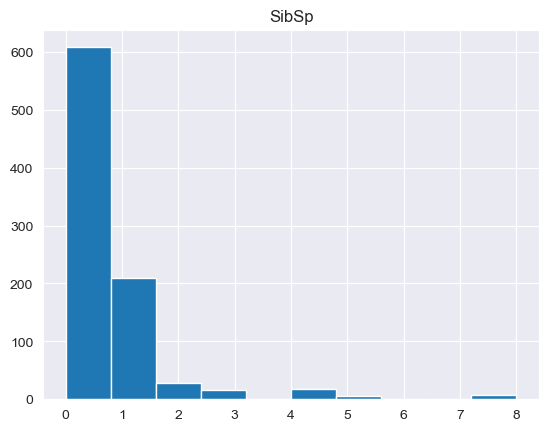

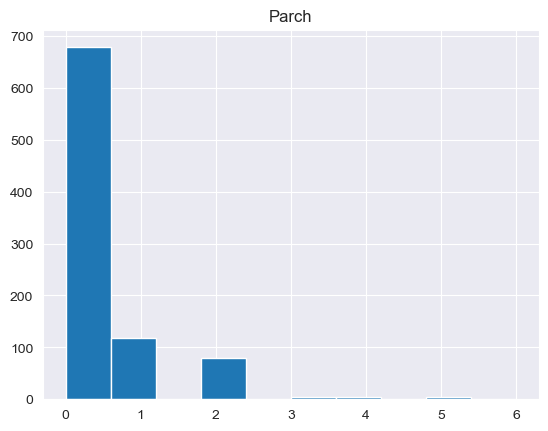

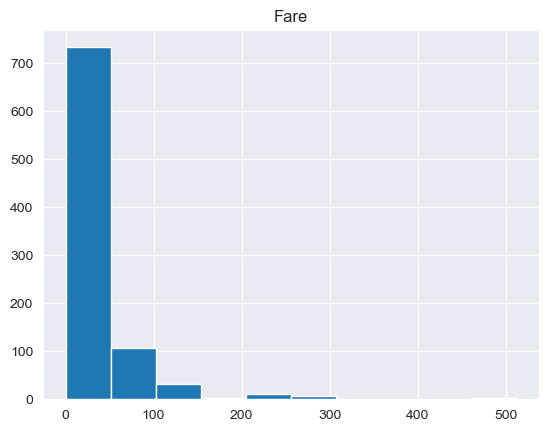

In [15]:
%matplotlib inline
for i in train_num.columns:
    plt.hist(train_num[i])
    plt.title(i)
    plt.show()

##### Note: Only "Age" variable is somewhat normally distributed but others are not. <br> Will decide to normalize based on further data investigation.

### 5. Correlation between numeric values

            Age     SibSp     Parch      Fare
Age    1.000000 -0.308247 -0.189119  0.096067
SibSp -0.308247  1.000000  0.414838  0.159651
Parch -0.189119  0.414838  1.000000  0.216225
Fare   0.096067  0.159651  0.216225  1.000000


<Axes: >

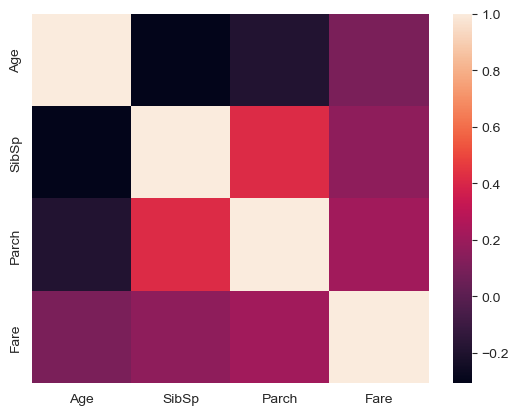

In [16]:
print(train_num.corr())
sns.heatmap(train_num.corr())

##### "Parch" and "SibSp" have a correlation of 0.414838 as Parents, Children and Siblings (Families) tend to travel together. <br> This preliminary investigation ensures that we eliminate the risk of Multi-Collinearity during Regression.

### 6. Survival rate across numeric values

In [17]:
pd.pivot_table(train_set, index='Survived', values=['Age','SibSp','Parch','Fare'])

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.626179,22.117887,0.329690,0.553734
1,28.343690,48.395408,0.464912,0.473684


##### Note: The result doesn't give us straight-forward insights but it is possible that: <br>
#####            1. Children have higher chance of surviving.
#####            2. People who paid more Fare have higher chance of surviving.

### 7. Barplots for Categorical Variables

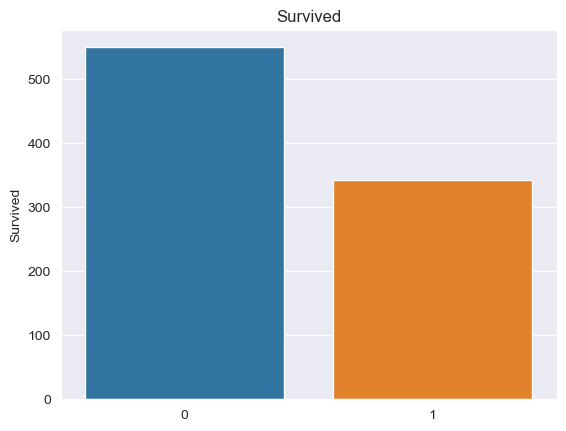

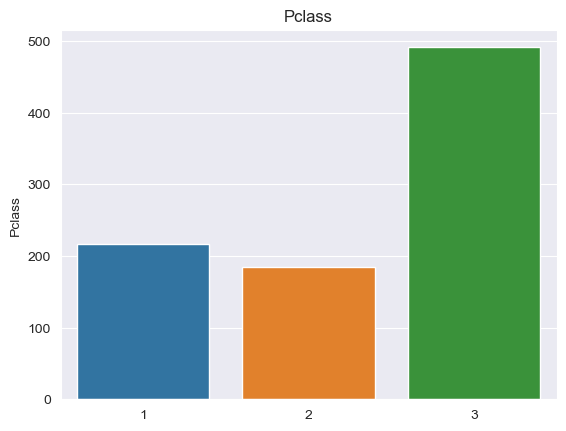

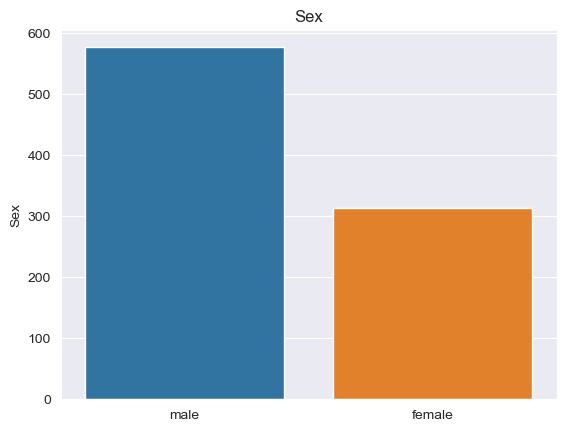

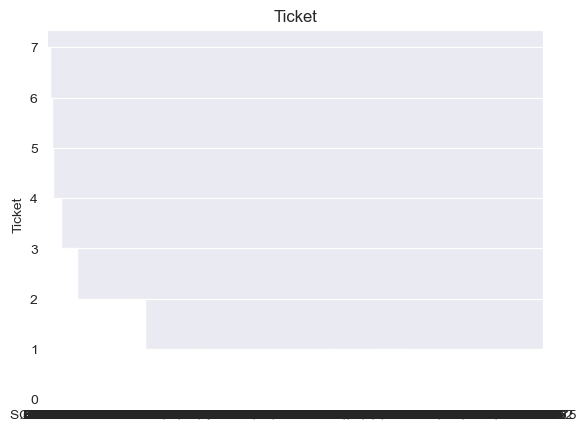

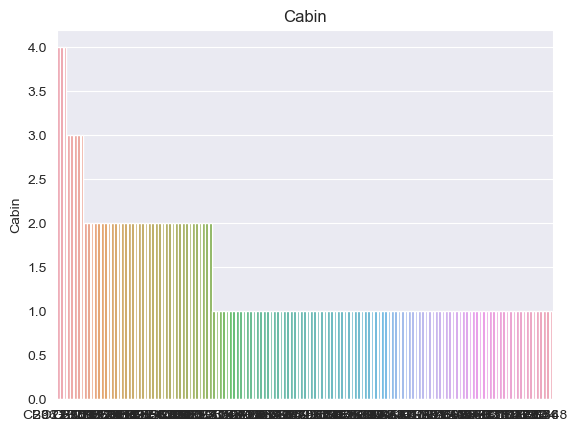

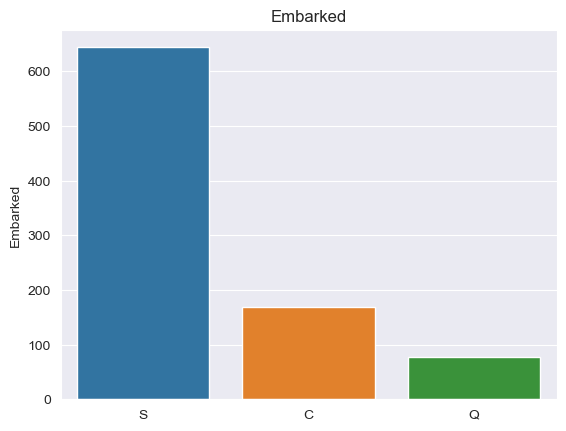

In [18]:
for i in train_cat.columns:
    sns.barplot(x= train_cat[i].value_counts().index,y = train_cat[i].value_counts()).set_title(i)
    plt.show()

##### Note: The above graphs give us an idea on how the data are distributed across different categorical data. <br> Particularly "Cabin" and "Ticket" could be further improved upon using feature engineering.

### 8. Survival rates across categorical variables

In [20]:
print(pd.pivot_table(train_set, index="Survived", columns = "Pclass", values = "Ticket", aggfunc="count"),"\n")
print(pd.pivot_table(train_set, index="Survived", columns = "Sex", values = "Ticket", aggfunc="count"),"\n")
print(pd.pivot_table(train_set, index="Survived", columns = "Embarked", values = "Ticket", aggfunc="count"),"\n")

Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119 

Sex       female  male
Survived              
0             81   468
1            233   109 

Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  217 


## *__Finding correlation between "Survival" and different variables - Logistic Regression (Categorical Y)__*

#### 1. Preparing data for Analysis

In [21]:
original_data_copy = df


y = df["Survived"]

X = df[["Pclass","Sex","Age","SibSp","Parch","Fare"]]

gender_mapping = {"male": 1, "female": 0}
X["Sex"] = X["Sex"].map(gender_mapping)

print(X)

     Pclass  Sex   Age  SibSp  Parch      Fare
0         3    1  22.0      1      0    7.2500
1         1    0  38.0      1      0   71.2833
2         3    0  26.0      0      0    7.9250
3         1    0  35.0      1      0   53.1000
4         3    1  35.0      0      0    8.0500
..      ...  ...   ...    ...    ...       ...
413       3    1   NaN      0      0    8.0500
414       1    0  39.0      0      0  108.9000
415       3    1  38.5      0      0    7.2500
416       3    1   NaN      0      0    8.0500
417       3    1   NaN      1      1   22.3583

[1309 rows x 6 columns]


/var/folders/g3/qm_v9cxd4kv16kx3gxm1vbch0000gn/T/ipykernel_30684/3000021705.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Sex"] = X["Sex"].map(gender_mapping)


#### 2. Data Cleanup

In [22]:
X[X.isna().any(axis=1)]
#print(len(X[X.isna().any(axis=1)])) - 177

#Replacing NaN values with mean age
X[X.isna().any(axis=1)] = X["Age"].mean()

/var/folders/g3/qm_v9cxd4kv16kx3gxm1vbch0000gn/T/ipykernel_30684/3009149820.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[X.isna().any(axis=1)] = X["Age"].mean()


#### 3. Logistic Regression

In [23]:
model = LogisticRegression()
model.fit(X, y)

# Create a bar chart to visualize feature importance (same as previous code)
feature_importance = np.abs(model.coef_[0])
plt.figure(figsize=(10, 6))
plt.barh(X.columns, feature_importance)
plt.xlabel("Feature Importance")
plt.title("Feature Importance in Logistic Regression")
plt.show()

ValueError: Input y contains NaN.

#### Preliminary Notes:
##### 1. "Parch" has the highest feature importance - The # of parents/children on board.
######    This could likely mean that Parents/Children travelling together were given very high importance. Requires further investigation.
##### 2. "Sex" has the second highest feature importance - The person's gender.
######    This could likely mean that belonging to certain gender could increase the chances of survival. Requires further investigation.
##### 3. "Pclass" has the third highest feature importance - The ticket class.
######    This could likely mean that belonging to certain Pclass could increase the chances of survival. Requires further investigation.

## *__Feature Engineering__*

## 1. Cabin - We simplify Cabin variable categories. <br> 
### Additionally, we see if purchase of multiple cabins has any impact. 

### 1.1 Splitting people with multiple cabins

In [27]:
train_set['cabin_multiple'] = [0 if pd.isna(x) else len(x.split(' ')) for x in train_set['Cabin']]
train_set['cabin_multiple'].value_counts()

0    687
1    180
2     16
3      6
4      2
Name: cabin_multiple, dtype: int64

### 1.2 Survival rate for people with multiple cabins.

In [28]:
print(pd.pivot_table(train_set, index="Survived", columns = "cabin_multiple", values = "Ticket", aggfunc="count"),"\n")

cabin_multiple      0      1    2    3    4
Survived                                   
0               481.0   58.0  7.0  3.0  NaN
1               206.0  122.0  9.0  3.0  2.0 


##### Note: Doesn't seem like that was the case necessarily.

### 1.3 Creating Categories based on first alphabet of the Cabins.
##### Based on the assumption that each class/area of cabin would be grouped together (as in Hotels).

In [34]:
train_set['cabin_adv'] = train_set['Cabin'].astype(str).str[0]
print(train_set['cabin_adv'].value_counts())

n    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: cabin_adv, dtype: int64


### 1.4 Survival rate based on the new Cabin values

In [35]:
print(pd.pivot_table(train_set, index="Survived", columns = "cabin_adv", values = "Ticket", aggfunc="count"),"\n")

cabin_adv    A     B     C     D     E    F    G    T      n
Survived                                                    
0          8.0  12.0  24.0   8.0   8.0  5.0  2.0  1.0  481.0
1          7.0  35.0  35.0  25.0  24.0  8.0  2.0  NaN  206.0 


##### Note: This feature engineering provided us with clear insight that people with Letter cabin numbers had clearly higher chance of surviving than those with null values in the Cabin column.